<div class="alert alert-info">
<h2>Introduction:</h2>
        <p>
            Zuber ride sharing company's research for the Chicago launch. We are trying to finding patterns to understand passenger preferences, where we can focus on getting rides in this market to establish ourselves, and if there are any impacts of external factors on rides. 
        </p>
    <h4>Goal:</h4>
        <p>
            The goal of this analysis is to figure out where we could fit in and target market for this Chicago launch as well as figure out the data from competitors to be able to test the hypothesis of the impact of weather on ride frequency.
        </p>
 
</div>

<div class="alert alert-info">
<h2>Data Overview:</h2>
   
</div>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 
import scipy.stats as stats

In [2]:
# I named the dataframe results01_df so I could easily tell which dataframe it was since there are 2 others that will be imported.
results01_df = pd.read_csv('/datasets/project_sql_result_01.csv')
# I printed the dataframe so I could kind of get a general overview of what I was working with. 
results01_df

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


In [3]:
# I checked this dataframes info so I could see what Datatypes each column used. 
results01_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
# I did isna() and .sum() so I could see if there were any missing values and there are no missing values. 
results01_df.isna().sum()

company_name    0
trips_amount    0
dtype: int64

In [5]:
# there were 64 companys in the dataframe and I took the dataframe and did a groupby to sort dataframe by the company name.
# which then calculates each company by the total amount of trips they had. then sorts them in the order which has the most.
# then only pulls the dataframe by the companies that had the top 20 trip amounts thats because they are the most significant.
company_top_20 = results01_df.groupby('company_name')['trips_amount'].sum().sort_values(ascending=False).head(20).reset_index()
company_top_20

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


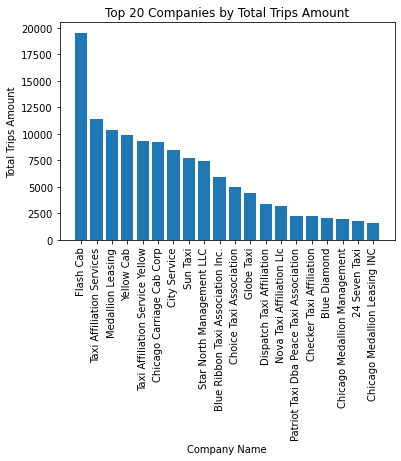

In [6]:
# Calculate the top 20 companies by total trips amount
company_top_20 = results01_df.groupby('company_name')['trips_amount'].sum().sort_values(ascending=False).head(20).reset_index()

# Bar plot for top 20 companies by total trips amount
plt.bar(company_top_20['company_name'], company_top_20['trips_amount'])
plt.xticks(rotation=90)
plt.title('Top 20 Companies by Total Trips Amount')
plt.xlabel('Company Name')
plt.ylabel('Total Trips Amount')

plt.show()
# I redid the groupby again so it was easier for me to see the contents and not have to go up to the cell above.
# I thought this table was a little challenging to read so I decided to make it more legible in the next graph! 

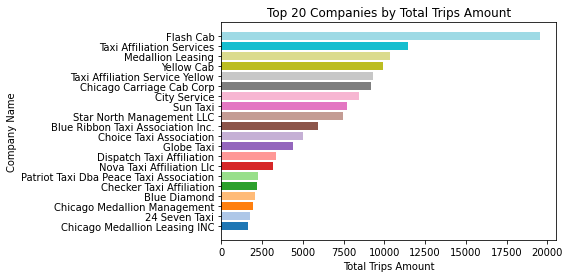

In [7]:
# Generate color map
colors = plt.cm.get_cmap('tab20', len(company_top_20))

# Sort the DataFrame in descending order
company_top_20 = company_top_20.sort_values('trips_amount', ascending=True)


# Bar plot (histogram) for top 20 companies by total trips amount
plt.barh(np.arange(len(company_top_20)), company_top_20['trips_amount'], color=colors(range(len(company_top_20))))
plt.yticks(np.arange(len(company_top_20)), company_top_20['company_name'])
plt.title('Top 20 Companies by Total Trips Amount')
plt.xlabel('Total Trips Amount')
plt.ylabel('Company Name')

plt.show()

# this to me looks way better and represents the data in a much cleaner more legible graph. 

<div class="alert alert-info">
<h4>conclusion:</h4>
    <p>
        The overall conclusion in this graph is that Flash Cab is by far your most used cab service in Chicago If we could get in there during this launch and try to take atleast 10000 rides from Flash Cab that would put us in direct competition to be the number one cab service in the Chicago area. so focusing on taking from Flash Cab could be a great strategy. 
    </p>
</div>

In [8]:
# I named the dataframe for the 2nd dataframe results04_df so it is equal to the csv file and it seperates it from the 1st dataframe.
results04_df = pd.read_csv('/datasets/project_sql_result_04.csv')
# I printed the dataframe to get a general overview of what I am working with! 
results04_df

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [9]:
# I printed the info to check the datatypes of each column within the dataframe. I am glad to see average_trips is a float. 
results04_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [10]:
# I used the isna and .sum to check to see if there are any missing values in the columns there are no missing values! 
results04_df.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [11]:
# I checked the 10 ten average trips and sorted them so its sorted from the most trips to the least. 
results04_df['average_trips'].sort_values(ascending=False).head(10)

0    10727.466667
1     9523.666667
2     6664.666667
3     5163.666667
4     2546.900000
5     2420.966667
6     2068.533333
7     1510.000000
8     1364.233333
9     1259.766667
Name: average_trips, dtype: float64

In [12]:
# I grouped by the dropoff location then sorted the average trips so the one with the most average trips would be first and only took the top 10 
main_10_drop = results04_df.groupby('dropoff_location_name')['average_trips'].sum().sort_values(ascending=False).head(10).reset_index()
# I took the renamed dataframe and printed it to make sure the dataframe had the accurate information that i was looking for. 
main_10_drop

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


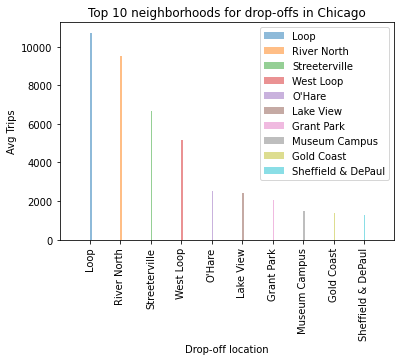

In [13]:
# Calculate the top 10 drop-off locations
main_10_drop = results04_df.groupby('dropoff_location_name')['average_trips'].sum().sort_values(ascending=False).head(10).reset_index()

# Bar plot for neighborhood drop-offs
fig, ax = plt.subplots()
for i in main_10_drop['dropoff_location_name']:
    dropoff_locations = results04_df[results04_df['dropoff_location_name'] == i]
    ax.hist(dropoff_locations['dropoff_location_name'], bins=20, weights=dropoff_locations['average_trips'], alpha=0.5, label=i)

ax.set_title('Top 10 neighborhoods for drop-offs in Chicago')
ax.set_xlabel('Drop-off location')
ax.set_ylabel('Avg Trips')
ax.legend()

plt.xticks(rotation=90)

plt.show()

<div class="alert alert-info">
<h4>Conclusion:</h4>
    <p>
        The Loop is the most significant drop off area which also happens to be the central business district right in the heart of downtown Chicago the next significant one is River north which is the cultural district of chicago if we focus on being in The Loop throughout the day and River North at night we will capture the two most prominent markets in Chicago. 
    </p>
   
</div>


In [14]:
# I got the results07 dataframe and named it that to make it different from the other 3. 
results07_df = pd.read_csv('/datasets/project_sql_result_07.csv')
results07_df

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [15]:
# I looked at the datatypes for each column and I need to change the start_ts to be a date time datatype 
results07_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [16]:
# I did the pandas method to change the start_ts column to date time. 
results07_df['start_ts'] = pd.to_datetime(results07_df['start_ts'])
results07_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [17]:
# I looked for the missing values within this datframe. 
results07_df.isna().sum()


start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [18]:
# I looked at the weather conditions within the dataframe. 
results07_df['weather_conditions']

0       Good
1       Good
2       Good
3       Good
4       Good
        ... 
1063    Good
1064    Good
1065    Good
1066    Good
1067     Bad
Name: weather_conditions, Length: 1068, dtype: object

<div class="alert alert-info">
<h2>Hypotheses:</h2>
   <p>
       This is testing the hypotheses of rides from the Loop to O'Hare International Airport and if bad weather impacts the travel. 
    </p>
</div>

In [19]:
# Extract data for rainy Saturdays
rainy_saturdays_data = results07_df[results07_df['weather_conditions'] == 'Bad']['duration_seconds']

# Extract data for non-rainy Saturdays
non_rainy_saturdays_data = results07_df[results07_df['weather_conditions'] != 'Bad']['duration_seconds']

# Perform t-test
t_statistic, p_value = stats.ttest_ind(rainy_saturdays_data, non_rainy_saturdays_data, equal_var=False)

# Set the significance level (alpha)
alpha = 0.05

# Compare p-value with alpha
if p_value <= alpha:
    print("Reject null the hypothesis. The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence to conclude that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.")

# Print the p-value result
print("p-value:", p_value)

Reject null the hypothesis. The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.
p-value: 6.738994326108734e-12


<div class="alert alert-info">
<h4>Conclusion:</h4>
    <p>
        The code above Is being used to figure out the average duration of rides changes on days when the weather is bad and not bad. first I seperated the data into two groups rides on bad weather saturdays and rides on not bad weather saturdays and 
it told us how long each ride lasted compared to one another. 
        Then I performed the calculation called a t-test this calculation helps us see if there is a significant difference between the two groups. In this case we were using it to look for the average duration of rides difference when its bad weather to when its not bad weather. Next we set a significance level which is like a threshold for how confident we want to be in the conclusion. I set it as a common value of .05. 
So we took the result of the t-test and wanted to compare it to the p-value to check the significance level so if the p-value.
        So if the p-value is greater than .05 we dont have enough evidence to say the average ride duration is different This means the bad weather may not have a effect on the duration of rides. 
        So then I printed the p-value to see the actual number that resulted from the caluclation so the code checks if bad weather effects the average duration of rides and tells us if we can be confident in the conclusion or not. So based on the information provided we reject the null hypotheses that the average duration of rides changes due to bad weather. 
    </p>
</div>

<div class="alert alert-info">
<h2>Findings:</h2>
   <p> 
        The Findings of this analysis is that Flash Cab holds the majority of the market for rides and by making them the direct competition we could have a shot a being in the top of the market automatically. As well as focusing on the Loop drop off location for the days business hours for the transportation of workers in the heart of downtown as well as focus to have heavy influence in the River North area in for their great nightlife and cultural district aspects could really make us a strong force in this Chicago market. Especially sense weather conditions aren't definitively going to effect the duration of rides. I hope this research helped for our Chicago Launch. Thanks 
    </p>
</div>